# A simple Jupyter notebook for analyzing output from muonEDM simulation

## 1. First import the ROOT and math libraries

In [1]:
import ROOT as r
r.gROOT.Macro( './rootlogon.C' )
r.gStyle.SetPalette(51)
import math
pi = math.pi

Welcome to JupyROOT 6.12/06


## 2. Now read the ROOT file and TTree from the data folder and create a canvas to show plots

In [2]:
c1 = r.TCanvas('c1','c1',1200,800)
c1.Divide(2,2)

c2 = r.TCanvas('c2','c2',1200,800)
c2.Divide(2,2)

c3 = r.TCanvas('c3','c3',1200,800)
c3.Divide(2,2)

c4 = r.TCanvas('c4','c4',800,600)

file = r.TFile('../data/musr_uniform0.5T.root') # constant B-field of 0.5 T
#file = r.TFile('../data/musr_gradient0.5T_index025.root') # gradient field of 0.5 T at the ring center and slowly decreasing radially outward
#file = r.TFile('../data/musr_gradient0.5T_index025_HV30kV.root') # gradient field and radial E-field (30 kV for the outer electrode, ground for the inner electrode)

tree = file.Get('t1')

## 3. Draw the spin information and extract the relative spin-momentum precession frequency

Here the relevant information to be drawn is the spin information on a tracking plane at around (x,y) = (-200, 0). The spin will point at the same direction if it is frozen. 

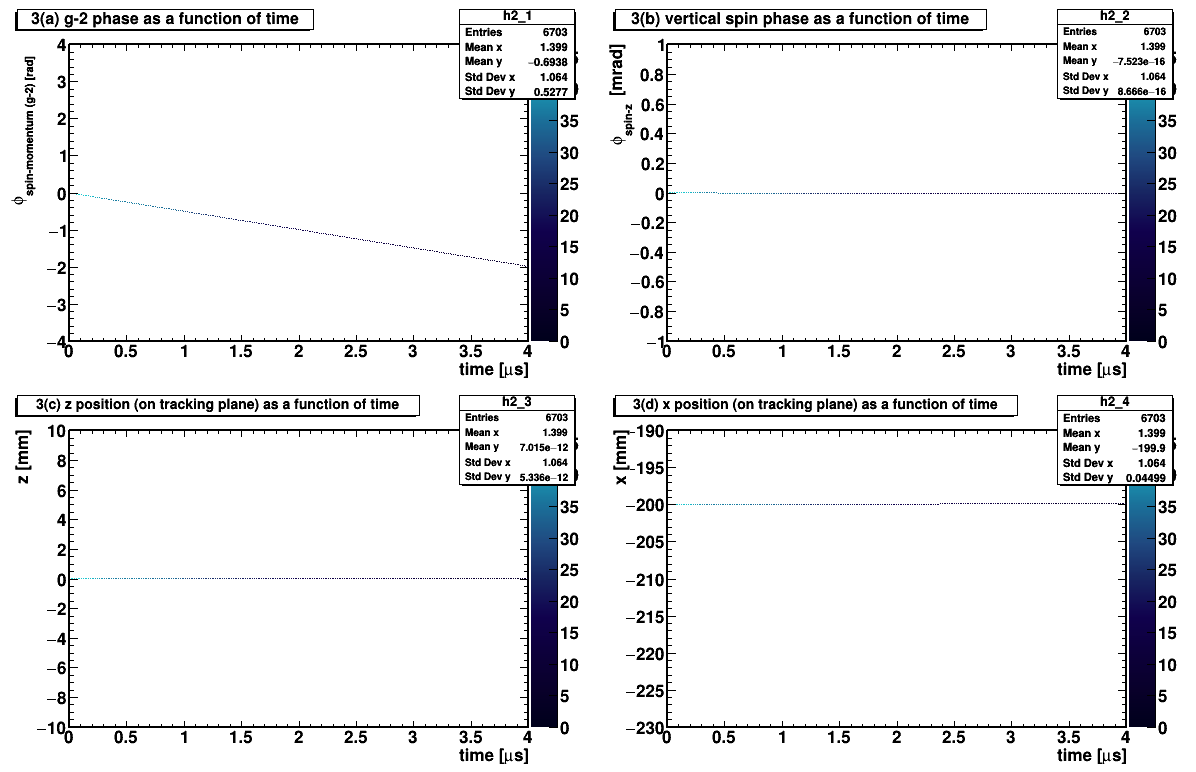

In [3]:
tree.Draw('atan2(save_poly,save_polx)-atan2(save_py,save_px):save_time>>h2_1(8000,0,4,1600,-4,4)',"save_particleID==-13","goff")
hist2d_1 = r.gDirectory.Get('h2_1')
tree.Draw('1000*atan2(save_polz,sqrt(save_polx*save_polx+save_poly*save_poly)):save_time>>h2_2(8000,0,4,1600,-1,1)',"save_particleID==-13","goff")
hist2d_2 = r.gDirectory.Get('h2_2')
tree.Draw('save_z:save_time>>h2_3(8000,0,4,800,-10,10)',"save_particleID==-13","goff")
hist2d_3 = r.gDirectory.Get('h2_3')
tree.Draw('save_x:save_time>>h2_4(8000,0,4,800,-230,-190)',"save_particleID==-13","goff")
hist2d_4 = r.gDirectory.Get('h2_4')

c1.cd(1)
hist2d_1.SetTitle("3(a) g-2 phase as a function of time")
hist2d_1.GetXaxis().SetTitle('time [#mus]')
hist2d_1.GetYaxis().SetTitle('#phi_{spin-momentum (g-2) [rad]}')
hist2d_1.Draw("colz")

c1.cd(2)
hist2d_2.SetTitle("3(b) vertical spin phase as a function of time")
hist2d_2.GetXaxis().SetTitle('time [#mus]')
hist2d_2.GetYaxis().SetTitle('#phi_{spin-z} [mrad]')
hist2d_2.Draw("colz")

c1.cd(3)
hist2d_3.SetTitle("3(c) z position (on tracking plane) as a function of time")
hist2d_3.GetXaxis().SetTitle('time [#mus]')
hist2d_3.GetYaxis().SetTitle('z [mm]')
hist2d_3.Draw("colz")

c1.cd(4)
hist2d_4.SetTitle("3(d) x position (on tracking plane) as a function of time")
hist2d_4.GetXaxis().SetTitle('time [#mus]')
hist2d_4.GetYaxis().SetTitle('x [mm]')
hist2d_4.Draw("colz")


hist2d_1c = hist2d_1.Clone()
hist2d_2c = hist2d_2.Clone()
hist2d_3c = hist2d_3.Clone()
hist2d_4c = hist2d_4.Clone()

c1.Draw()

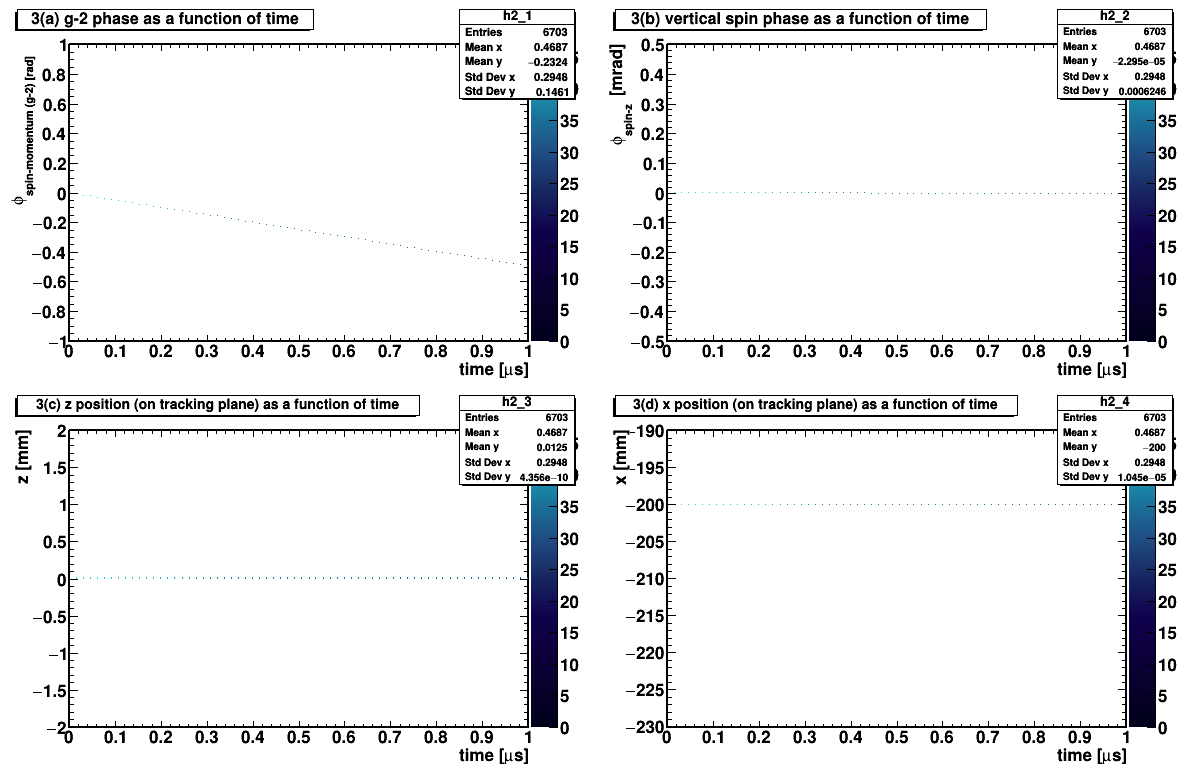

In [4]:
c2.cd(1)
hist2d_1c.GetXaxis().SetRangeUser(0,1)
hist2d_1c.GetYaxis().SetRangeUser(-1,1)
hist2d_1c.Draw("colz")
c2.cd(2)
hist2d_2c.GetXaxis().SetRangeUser(0,1)
hist2d_2c.GetYaxis().SetRangeUser(-0.5,0.5)
hist2d_2c.Draw("colz")
c2.cd(3)
hist2d_3c.GetXaxis().SetRangeUser(0,1)
hist2d_3c.GetYaxis().SetRangeUser(-2,2)
hist2d_3c.Draw("colz")
c2.cd(4)
hist2d_4c.GetXaxis().SetRangeUser(0,1)
hist2d_4c.GetYaxis().SetRangeUser(-250,-190)
hist2d_4c.Draw("colz")
c2.Draw()

Now convert these 2D histograms into 1D histogram (TProfile) for faster fitting

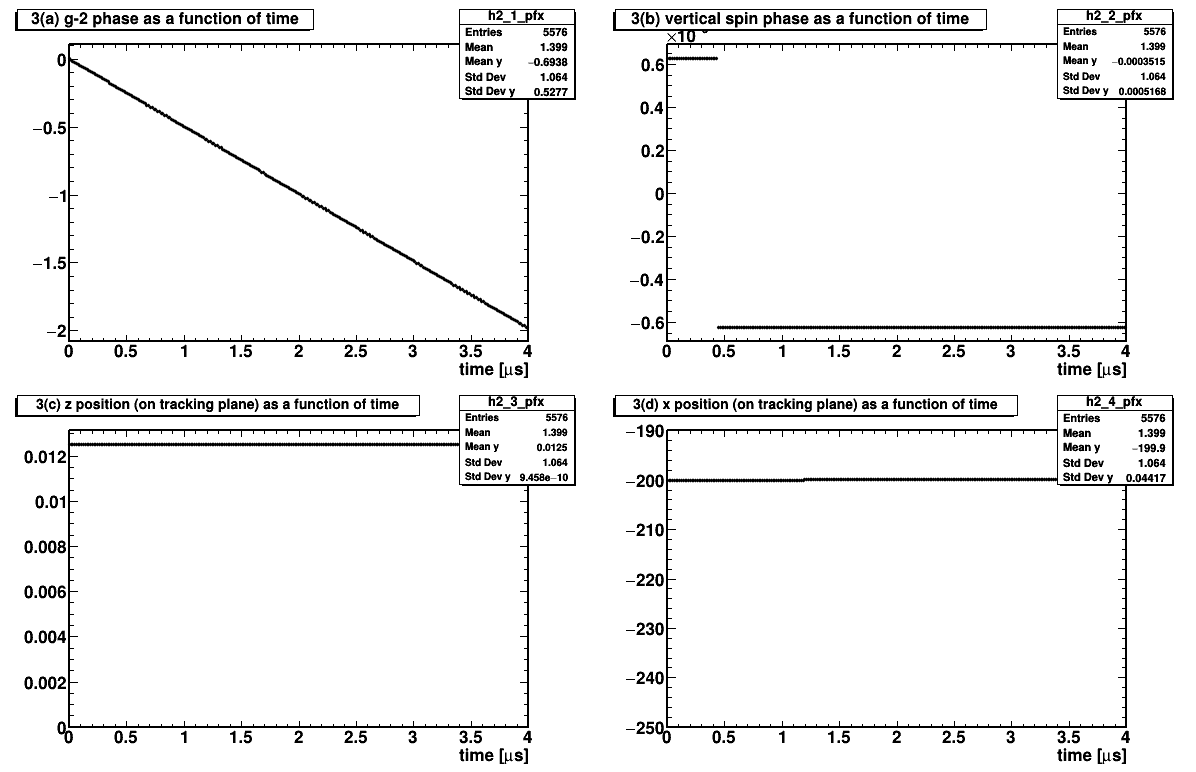

In [5]:
hist1d_1 = hist2d_1.ProfileX()
hist1d_2 = hist2d_2.ProfileX()
hist1d_3 = hist2d_3.ProfileX()
hist1d_4 = hist2d_4.ProfileX()

hist1d_1.SetMarkerStyle(20)
hist1d_1.SetMarkerSize(0.25)
hist1d_2.SetMarkerStyle(20)
hist1d_2.SetMarkerSize(0.25)
hist1d_3.SetMarkerStyle(20)
hist1d_3.SetMarkerSize(0.25)
hist1d_4.SetMarkerStyle(20)
hist1d_4.SetMarkerSize(0.25)
hist1d_4.GetYaxis().SetRangeUser(-250,-190)

c3.cd(1)
hist1d_1.Draw()
c3.cd(2)
hist1d_2.Draw()
c3.cd(3)
hist1d_3.Draw()
c3.cd(4)
hist1d_4.Draw()
c3.Draw()

## 4. Extract the relative spin-momentum precession frequency through a simple function fitting

 FCN=5.43875e+14 FROM MINOS     STATUS=FAILURE        81 CALLS         265 TOTAL
                     EDM=9.05809e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  \phi_{0}    -2.48389e-04   7.22360e-11  -0.00000e+00   8.77487e+09
   2  d\omega_{g-2}/dt  -4.95647e-01   1.85650e-10   1.85650e-10  -1.64227e+06


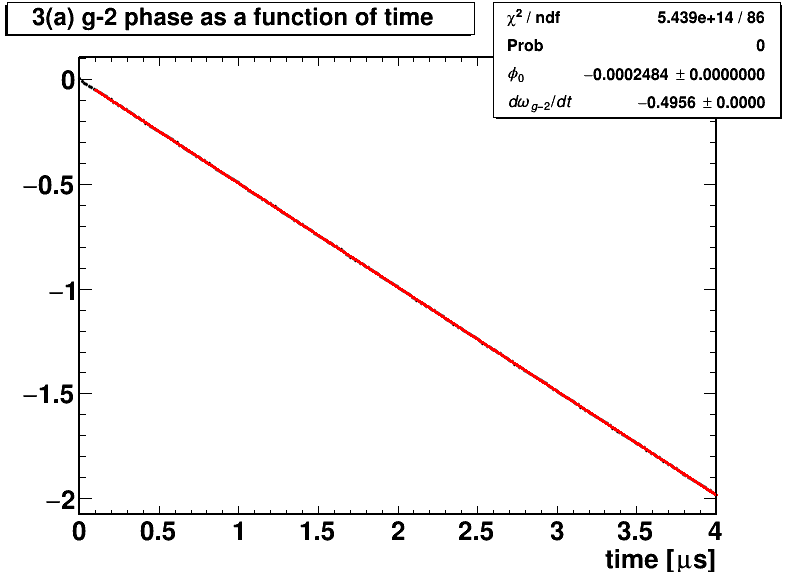

In [6]:
c4.cd()
#cos_fit = r.TF1("cos_fit","[0] + [1]*x + [2]*cos(2*pi*[3]*x+[4])",0.1,8)
cos_fit = r.TF1("cos_fit","[0] + [1]*x",0.1,4)
cos_fit.SetNpx(10000)
cos_fit.SetLineColor(2)
cos_fit.SetParameters(1.571,-0.45)
cos_fit.SetParNames("\phi_{0}","d\omega_{g-2}/dt")
hist1d_1.Fit("cos_fit","REM")
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
c4.Draw()

A simple FFT to look at the underlying frequencies in the g-2 phase plot

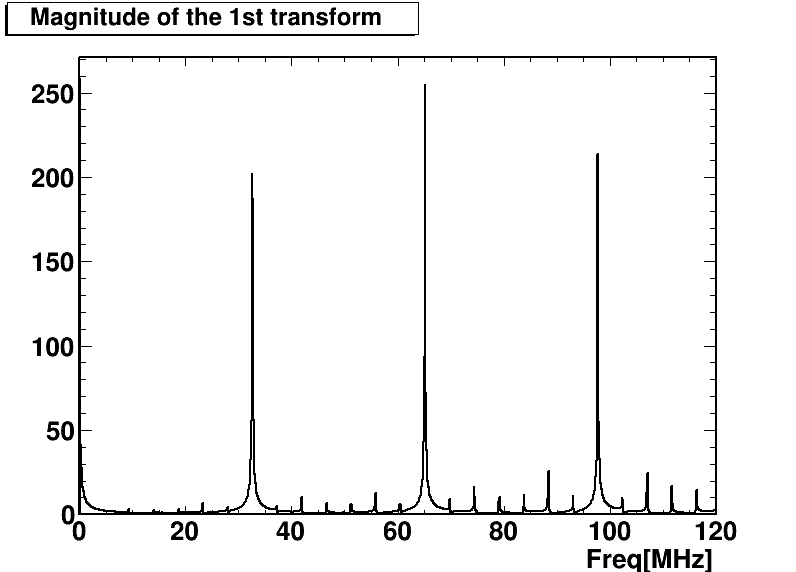

In [7]:
hm1 = r.TH1D("fft","fft",16000,0,2000)
hm1 = hist1d_1.FFT(hm1, "MAG")
hm1.SetTitle("Magnitude of the 1st transform")
hm1.Draw()
hm1.GetXaxis().SetRangeUser(0,120)
hm1.GetXaxis().SetTitle("Freq[MHz]")
c4.Draw()